## TORCH

In [48]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [49]:
digits = load_digits()

In [70]:
x = torch.tensor(digits.data / 16.0, dtype=torch.float32)
y = torch.tensor(digits.target, dtype=torch.long)

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [62]:
model = nn.Sequential(
    nn.Linear(64, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
)

In [63]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [64]:
epohs = 100
b_s = 32
for epoh in range(1, epohs+1):
    model.train()
    running_loss = 0
    perm = torch.randperm(x_train.shape[0])
    x_train_tensor = x_train[perm]
    
    for start in range(0, x_train.shape[0], b_s):
        x_b = x_train[start:start+b_s]
        y_b = y_train[start:start+b_s]
        optimizer.zero_grad()
        preds = model(x_b)
        loss = criterion(preds, y_b)
        loss.backward()
        optimizer.step()
        print(epoh, start, loss.item())

1 0 4.132016658782959
1 32 4.181999683380127
1 64 4.061229705810547
1 96 4.023124694824219
1 128 4.0751953125
1 160 3.9859981536865234
1 192 3.9614038467407227
1 224 3.882793664932251
1 256 3.857372283935547
1 288 3.8109676837921143
1 320 3.7764694690704346
1 352 3.68620228767395
1 384 3.61867356300354
1 416 3.588873863220215
1 448 3.5653347969055176
1 480 3.521120071411133
1 512 3.4486002922058105
1 544 3.375260829925537
1 576 3.3289847373962402
1 608 3.201305627822876
1 640 3.2097225189208984
1 672 3.1091458797454834
1 704 3.01455020904541
1 736 2.9557583332061768
1 768 2.970949411392212
1 800 2.870706558227539
1 832 2.788435220718384
1 864 2.6567134857177734
1 896 2.573820114135742
1 928 2.6381125450134277
1 960 2.537720203399658
1 992 2.4636757373809814
1 1024 2.479844808578491
1 1056 2.3655786514282227
1 1088 2.3106672763824463
1 1120 2.308638334274292
1 1152 2.3116774559020996
1 1184 2.2608742713928223
1 1216 2.1871843338012695
1 1248 2.250485420227051
1 1280 2.1524534225463867
1

In [66]:
i = 8
image = x_test[i].reshape(8, 8)
model.eval()
with torch.no_grad():
    preds = model(x_test)

<function matplotlib.pyplot.show(close=None, block=None)>

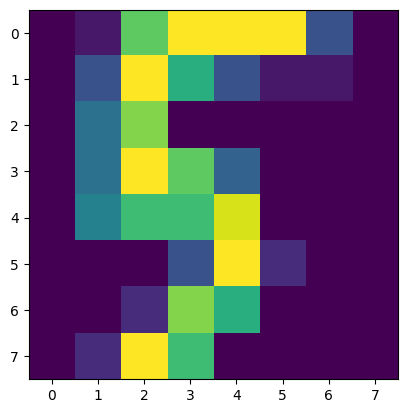

In [67]:
plt.imshow(image)
plt.show

In [68]:
print(classification_report(y_test.numpy(), pred_y.numpy()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.94      0.94      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.93      0.97      0.95        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

